In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from PIL import Image
from keras.preprocessing import image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

import pathlib

#root_dir = 'C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions'

from google.colab import drive
drive.mount('/content/drive')



root_dir = '/content/drive/MyDrive/IA_ProyectoAgosto/emociones'

train_dir = root_dir + '/train/'
test_dir = root_dir + '/test/'

Mounted at /content/drive


In [ ]:
labels = os.listdir(train_dir)
target_var = labels

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range= 0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

#Read our images to the data augmentations
#Generates batches of augmented data
train = train_datagen.flow_from_directory(train_dir,
                                          subset='training',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

valid = train_datagen.flow_from_directory(train_dir,
                                          subset='validation',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

test = test_datagen.flow_from_directory(test_dir,
                                        color_mode = 'grayscale',
                                        target_size = (48, 48),
                                        batch_size = 64,
                                        shuffle=False,
                                        class_mode = 'categorical')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Rescaling(1./225, input_shape=(48,48,1)),  # Use layers.Rescaling instead
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,571,591 (6.00 MB)

 Trainable params: 1,571,591 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
emotion2 = model.fit(train, validation_data=valid, epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 8550s 23s/step - accuracy: 0.2455 - loss: 1.8604 - val_accuracy: 0.2513 - val_loss: 1.8280
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 97s 266ms/step - accuracy: 0.2415 - loss: 1.8226 - val_accuracy: 0.2513 - val_loss: 1.8194
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 142s 266ms/step - accuracy: 0.2474 - loss: 1.8182 - val_accuracy: 0.2513 - val_loss: 1.8148
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 97s 265ms/step - accuracy: 0.2463 - loss: 1.8180 - val_accuracy: 0.2513 - val_loss: 1.8169
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 142s 267ms/step - accuracy: 0.2505 - loss: 1.8168 - val_accuracy: 0.2513 - val_loss: 1.8140
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 141s 264ms/step - accuracy: 0.2526 - loss: 1.8143 - val_accuracy: 0.2513 - val_loss: 1.8168
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 96s 264ms/step - accuracy: 0.2460 - loss: 1.8156 - val_accuracy: 0.2513 - val_loss: 1.8071
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 99s 272ms/step - accuracy: 0.2510 - loss: 1.8086 - 

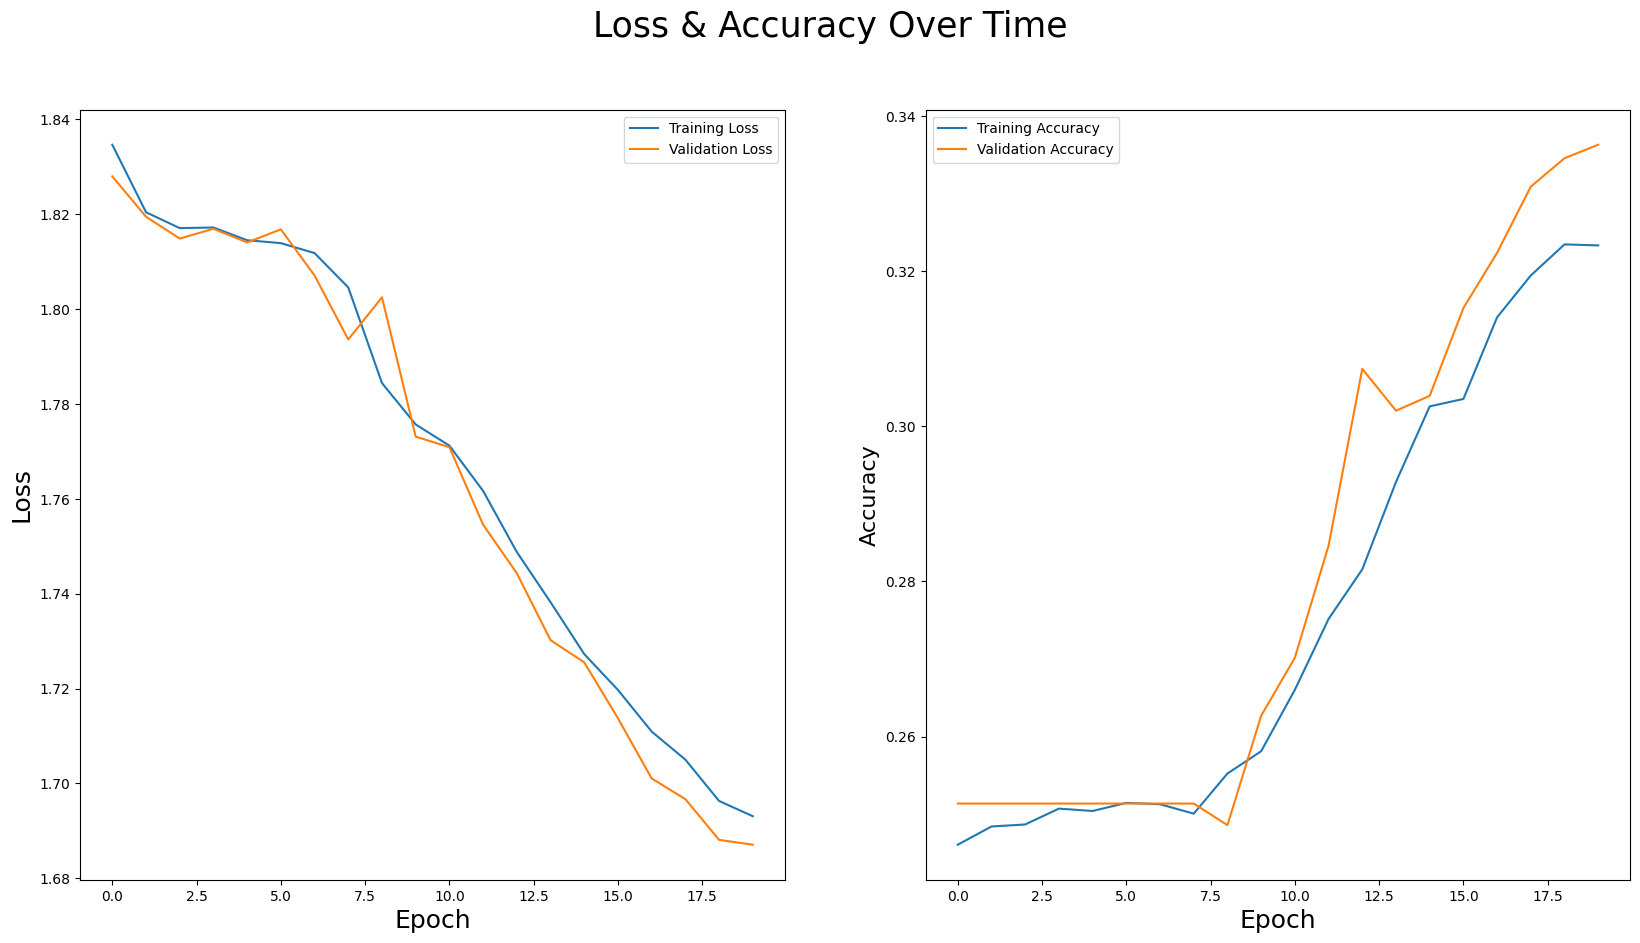

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion2.history['loss'], label='Training Loss')
plt.plot(emotion2.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion2.history['accuracy'], label='Training Accuracy')
plt.plot(emotion2.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')

# Guarda la figura en PDF
plt.savefig('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/result4', format='pdf')

# Opcionalmente, muestra la gráfica
plt.show()


In [10]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

359/359 ━━━━━━━━━━━━━━━━━━━━ 76s 211ms/step - accuracy: 0.3461 - loss: 1.6718
113/113 ━━━━━━━━━━━━━━━━━━━━ 2527s 23s/step - accuracy: 0.2515 - loss: 1.7662


In [11]:
# Guardar modelo y pesos
model.save('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/model_4.h5')
model.save_weights('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/model_4_weights.weights.h5') # Change the filename to end with .weights.h5


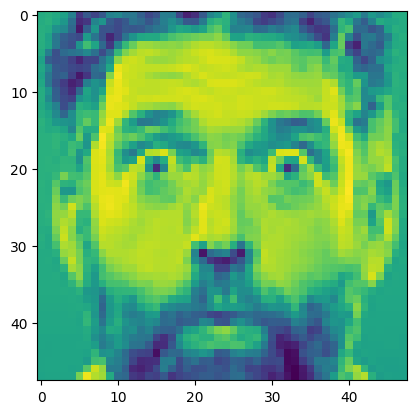

In [12]:
img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones/test/surprised/im30.png',
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [13]:
labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
[8.21e-43, 0.0, 1.911544e-22, 3.043445e-25, 8.7052804e-36, 8.56e-43, 1.0]
{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


In [14]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])
#wrong prediction

Prediction: surprised


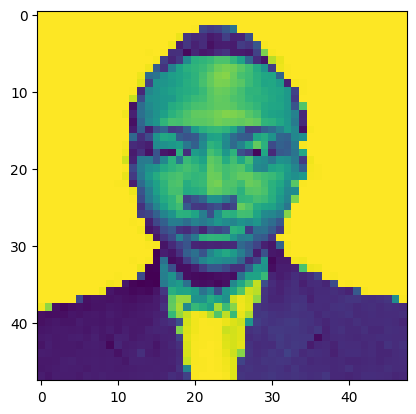

In [15]:
#checfking the example pic of surperised with the current model
img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones2/30.png',
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: happy


<BarContainer object of 7 artists>

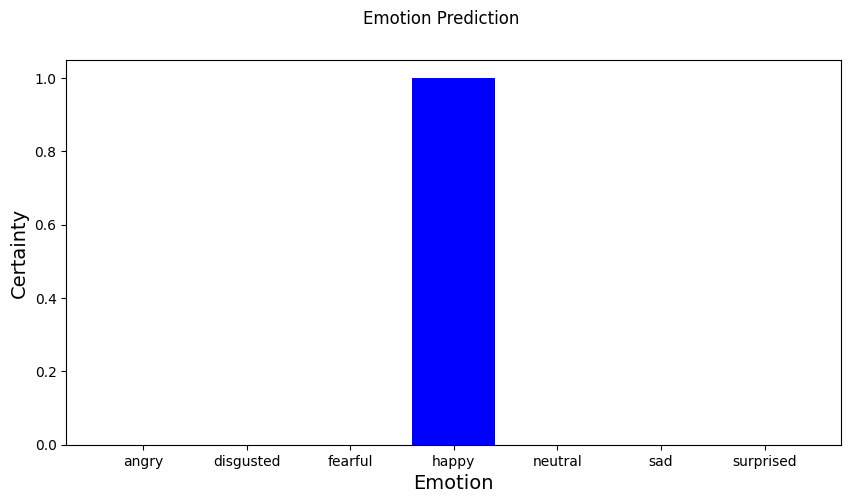

In [16]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#rigth prediction

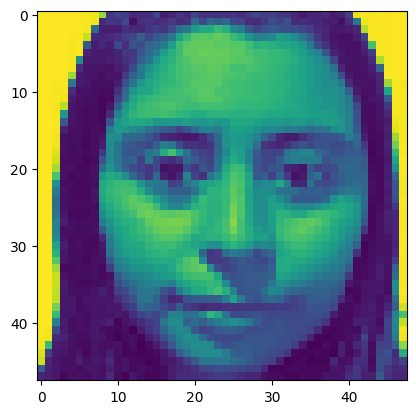

In [17]:
img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones2/46_1.png',
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: surprised


<BarContainer object of 7 artists>

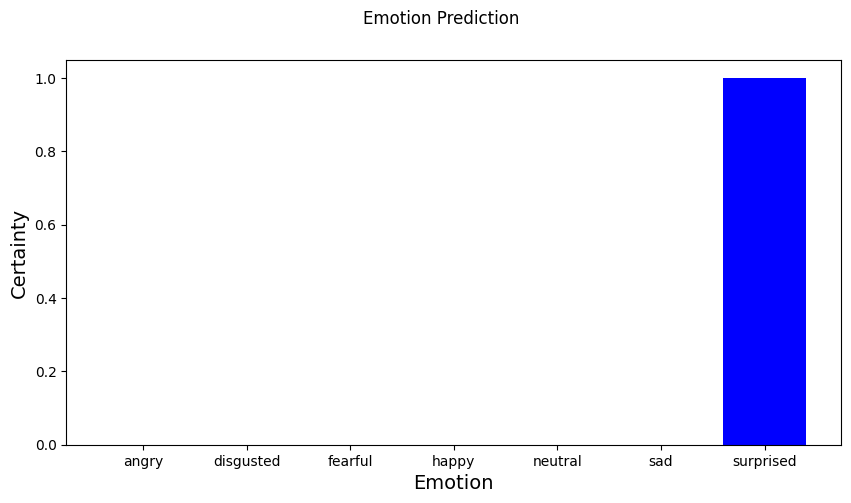

In [18]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#wrong prediction

In [ ]:
from fpdf import FPDF
from PIL import Image

# Abre la imagen
image_path = 'ruta_de_tu_imagen.png'
image = Image.open(image_path)

# Opcional: Asegúrate de que la resolución sea la que deseas
image = image.resize((image.width, image.height), Image.ANTIALIAS)

# Crea un PDF y ajusta tamaño según la imagen
pdf = FPDF(unit="pt", format=[image.width, image.height])
pdf.add_page()

# Agrega la imagen al PDF
pdf.image(image_path, 0, 0, image.width, image.height)

# Guarda el PDF
pdf_output_path = 'ruta_donde_guardar/imagen_en_alta_calidad.pdf'
pdf.output(pdf_output_path)
print(f"Imagen guardada en alta calidad en {pdf_output_path}")
